In [ ]:
# pip install pandas numpy scikit-learn matplotlib yfinance

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

from graphing import graph_normal, show_results
from get_data import get_apple_stock_split

In [16]:
scaler_X = StandardScaler()
scaler_Y = StandardScaler()

DAYS_LAG = 5

X_train, X_test, Y_train, Y_test = get_apple_stock_split(DAYS_LAG)
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

X_train = scaler_X.fit_transform(X_train)
Y_train = scaler_Y.fit_transform(Y_train)

X_test = scaler_X.transform(X_test)
Y_test = scaler_Y.transform(Y_test)

[*********************100%***********************]  1 of 1 completed

Training samples: 2171, Testing samples: 543


<h1> GridSearch setup </h1>

In [17]:
# Define the different hyperparameters
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [18]:
#training
model = KNeighborsRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,                       # cross-validation
    scoring='neg_mean_absolute_error',         # Use mse as scoring
    verbose=4,
    n_jobs=-1                   # Use all available cores
)

# Perform grid search on training data
grid_search.fit(X_train, Y_train.ravel())

results_df = pd.DataFrame(grid_search.cv_results_)


Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [19]:
# show_results(grid_search.cv_results_)

Final Model MAE: 0.6358198337765616
Final Model RMSE: 1.1713190093563175


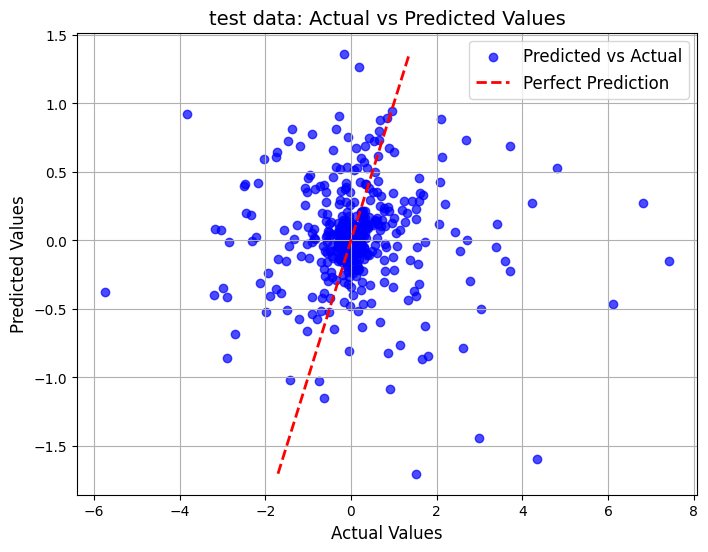

test data  MAE: 0.6358198337765616
test data  RMSE: 1.1713190093563175


In [20]:
# use best model to predict test data
final_model = grid_search.best_estimator_

# Predict on test data
final_predictions = final_model.predict(X_test)

# Evaluate the final model
mae = mean_absolute_error(Y_test, final_predictions)
mse = mean_squared_error(Y_test, final_predictions)
rmse = np.sqrt(mse)

print(f"Final Model MAE: {mae}")
print(f"Final Model RMSE: {rmse}")

graph_normal(final_predictions, Y_test, "test data")